What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [1322]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_org = pd.read_csv("MasterCapStoneFile_01.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records

#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records

#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records


#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

In [1323]:
# Removing outliers by query for the values to keep

df = df_org.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & `DB_M_Value` >0 & `DB_M_Value` <19  & `HD_M_Value` <10  & `HD_M_Value` >1  & `HBP_M_Value` >13 & `HBP_M_Value` <46 & `HC_M_Value` >22 & `HC_M_Value` <42  & `Target_Value` >1 & `Target_Value` < 5" )
print(df)






       HD_M_Value  HD_M_US  HD_M_REL_US  HBP_M_Value  HBP_M_US  HBP_M_REL_US  \
0             4.2      6.4    -0.343750         32.3      32.4     -0.003086   
2             5.8      6.4    -0.093750         33.8      32.4      0.043210   
3             4.4      6.4    -0.312500         27.4      32.4     -0.154321   
5             3.5      6.4    -0.453125         24.4      32.4     -0.246914   
6             5.5      6.4    -0.140625         28.1      32.4     -0.132716   
...           ...      ...          ...          ...       ...           ...   
27205         3.3      6.4    -0.484375         20.8      32.4     -0.358025   
27206         4.9      6.4    -0.234375         32.5      32.4      0.003086   
27207         6.7      6.4     0.046875         31.3      32.4     -0.033951   
27208         5.2      6.4    -0.187500         31.9      32.4     -0.015432   
27209         4.8      6.4    -0.250000         30.6      32.4     -0.055556   

       HC_M_Value  HC_M_US  HC_M_REL_US

In [1324]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

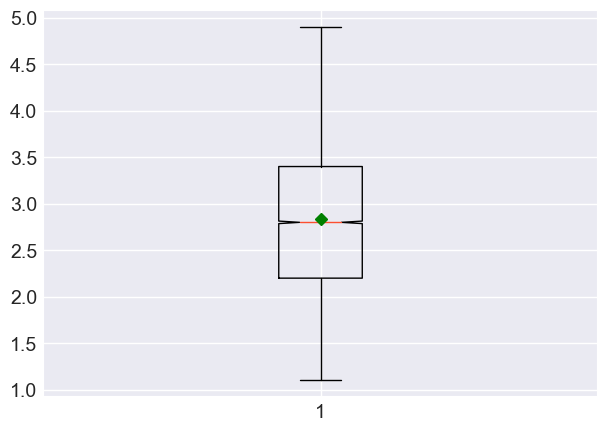

In [1325]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=df['Target_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [1326]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [1327]:
#print(df.isna)
df.isna().sum()

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

In [1328]:
# Count and determine the outliers 
HD_degree_counts = df['HD_M_Value'].value_counts() 
HBP_degree_counts = df['HBP_M_Value'].value_counts()
HC_degree_counts = df['HC_M_Value'].value_counts(normalize=True) # get the percentage for each group.
OB_degree_counts = df['OB_M_Value'].value_counts()
DB_degree_counts = df['DB_M_Value'].value_counts()

#print(HD_degree_counts)
#print(HBP_degree_counts)
#print(HC_degree_counts)
print(OB_degree_counts)
#print(DB_degree_counts)

26.8    118
27.1    113
26.5    113
27.9    112
24.6    109
       ... 
9.7       1
11.5      1
9.6       1
11.2      1
10.9      1
Name: OB_M_Value, Length: 404, dtype: int64


In [1329]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [1330]:
# verifying outliers from the mean of both lower and upper quantiles.
# Obesity= 78
# Diabetes = 171

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records
#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

#=============================================================


df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] 
df_HC_O_Grter  = df.loc[df["HC_M_Value"] > 45.0 ] 

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#print(df_HC_O_Less["HC_M_Value"].value_counts())
#print(df_HC_O_Grter["HC_M_Value"].value_counts())




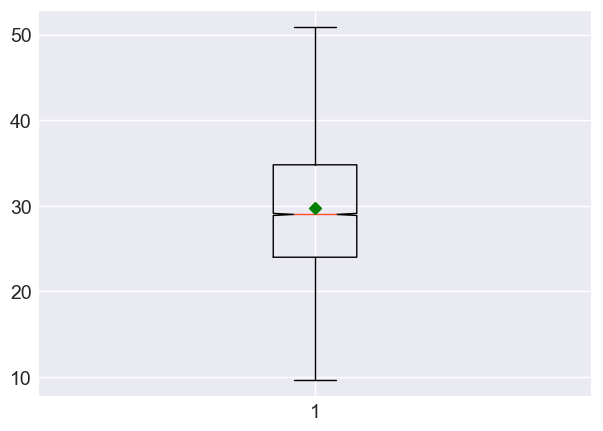

In [1331]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\2210461807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OB_M_Value'])


<Axes: xlabel='OB_M_Value', ylabel='Density'>

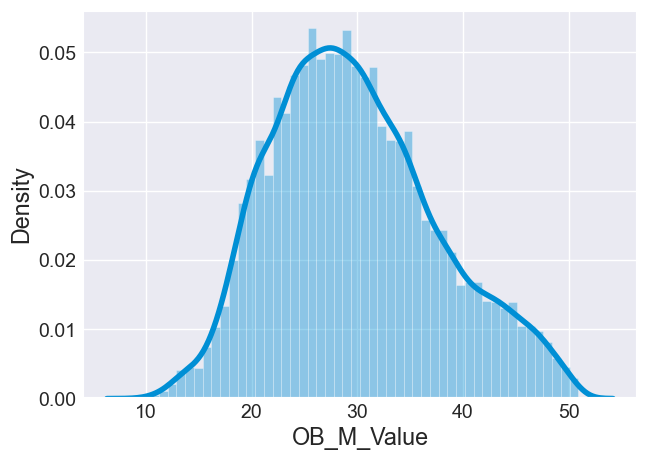

In [1332]:
sns.distplot(df['OB_M_Value'])

In [1333]:
df["OB_M_Value"].describe()



count    19112.000000
mean        29.778746
std          7.842022
min          9.600000
25%         24.000000
50%         29.000000
75%         34.800000
max         50.900000
Name: OB_M_Value, dtype: float64

In [1334]:
np.percentile(df['OB_M_Value'], [25, 50, 75, 100])

array([24. , 29. , 34.8, 50.9])

In [1335]:
import statistics

statistics.quantiles(df['OB_M_Value'])

[24.0, 29.0, 34.8]

In [1336]:
# Quantile mean it divide data into group.
# 0.50 is the median or 50% quantile. It's 0.5 quantile. 

df_Percentile = df.describe([0.15, 0.25, 0.50, 0.75])
df_Percentile

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
15%,3.600000,6.400000e+00,-0.437500,23.000000,3.240000e+01,-0.290123,27.600000,3.410000e+01,-0.190616,21.500000,3.010000e+01,-0.285714,6.700000,1.080000e+01,-0.379630,1.900000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [1337]:
df_Percentile['HD_M_Value']

count    19112.000000
mean         5.315435
std          1.704583
min          1.100000
15%          3.600000
25%          4.100000
50%          5.200000
75%          6.400000
max          9.900000
Name: HD_M_Value, dtype: float64

In [1338]:
df_Percentile['HD_M_Value'][0]

19112.0

In [1339]:
df_Percentile['HD_M_Value']['mean']
df_Percentile['HD_M_Value']['std']
df_Percentile['HD_M_Value']['15%']

3.6

In [1340]:
HD_degree_counts = df['HD_M_Value'].value_counts()

In [1341]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [1342]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

Index:   Int64Index([    0,     2,     3,     5,     6,     7,     9,    10,    11,
               13,
            ...
            27199, 27200, 27201, 27202, 27204, 27205, 27206, 27207, 27208,
            27209],
           dtype='int64', length=19112)
Columns: Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')
Size:    305792
Shape:   (19112, 16)


,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [1343]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [1344]:
df.columns


Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1345]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
df["DB_M_Value"].describe()
#df["Target_Value"].describe()



count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [1346]:
#df.describe().T
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

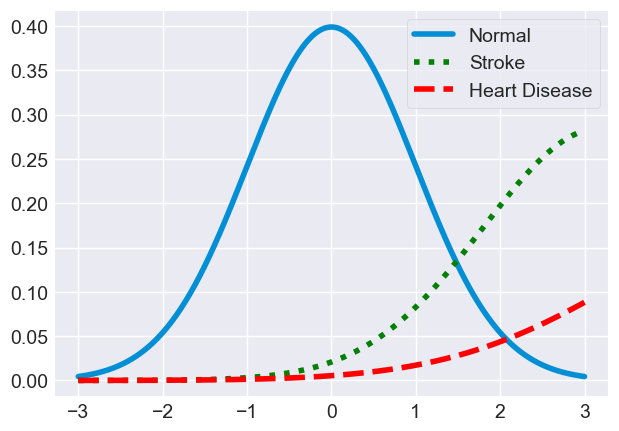

In [1347]:
from scipy.stats import norm


x = np.arange(-3, 3, 0.001)

plt.plot(x,norm.pdf(x)) # normal line
plt.plot(x, norm.pdf(x, 3.2, 1.4), 'g:') # mean of 3.2 and std 1.4 of stroke
plt.plot(x, norm.pdf(x, 5.6, 2.1), 'r--') # Heart Disease

plt.legend([ 'Normal', 'Stroke', 'Heart Disease',])
plt.show()

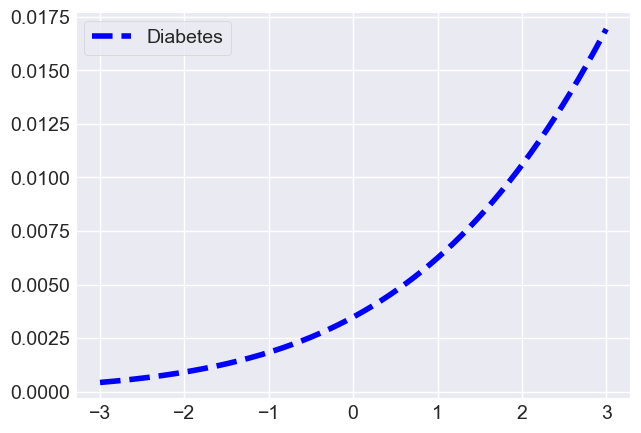

In [1348]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x, 10.8, 4.2), 'b--') # DB
plt.legend([ 'Diabetes'])
plt.show()

In [1349]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1350]:
from scipy.stats import skew

In [1351]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

4.4

In [1352]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


6.1

In [1353]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1354]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



0.31822550937884453
0.2440983386931991
-0.04141745598724707
0.39347948883113487
0.34294882665638926
0.3327762902205886


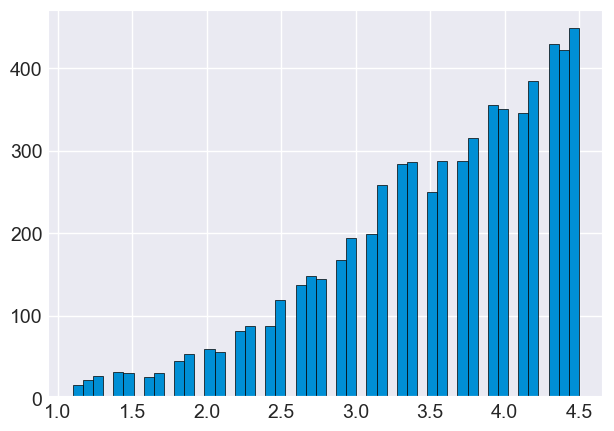

In [1355]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

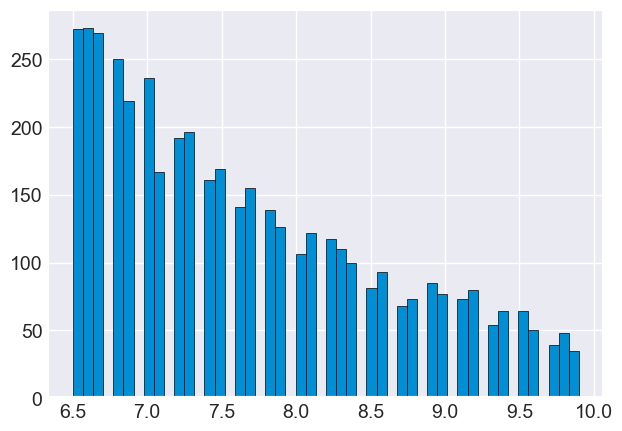

In [1356]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

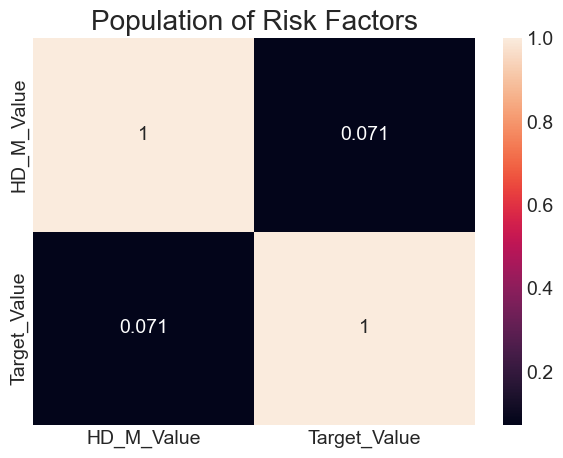

In [1357]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

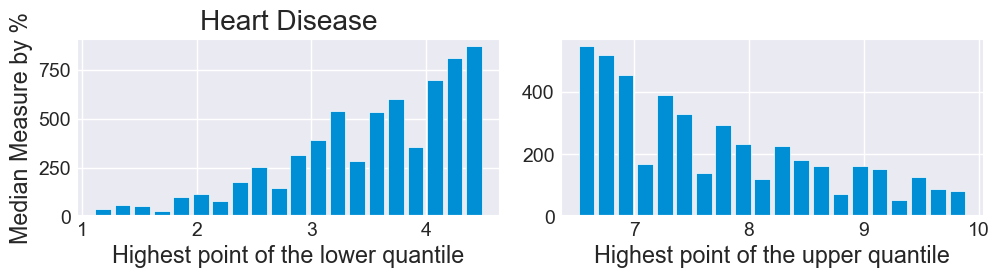

In [1358]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

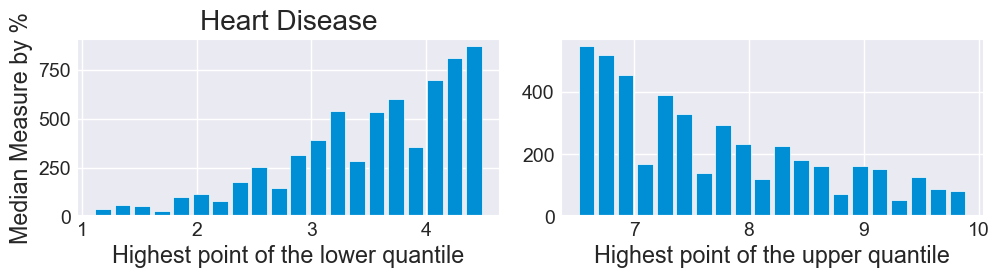

In [1359]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

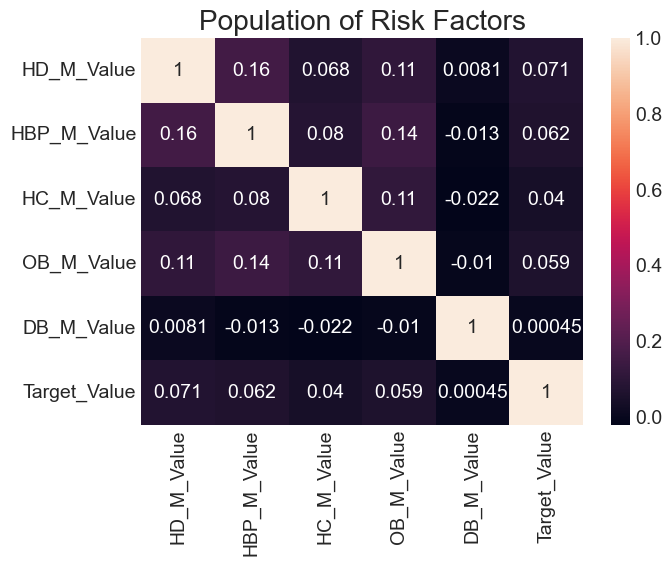

In [1360]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Histrograms =  show the frequency of distribution. 

In [1361]:
from scipy.stats import poisson


In [1362]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [1363]:
DB_degree_counts = df['DB_M_Value'].value_counts()

print(DB_degree_counts)

8.9    264
9.1    261
8.3    254
8.4    251
9.4    248
      ... 
0.9      4
2.0      4
1.8      4
1.1      2
1.0      2
Name: DB_M_Value, Length: 180, dtype: int64


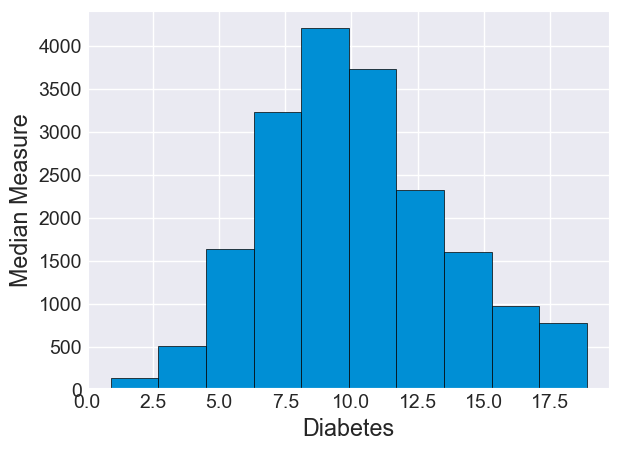

In [1364]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

In [1365]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [1366]:
df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 20.0 ] # 99 records

print(df_DB_O_Less["HC_M_Value"].value_counts())
#print(df_DB_O_Greater["HC_M_Value"].value_counts())


29.9    4
36.3    2
32.0    2
34.5    2
36.5    2
29.7    2
29.8    2
30.6    2
24.6    1
34.0    1
31.2    1
26.0    1
30.9    1
28.4    1
33.9    1
32.8    1
35.8    1
39.7    1
33.0    1
35.7    1
29.3    1
32.3    1
37.0    1
36.7    1
29.2    1
23.0    1
30.1    1
34.2    1
29.1    1
28.7    1
32.4    1
34.7    1
31.4    1
29.5    1
34.9    1
36.2    1
30.5    1
28.3    1
30.2    1
28.5    1
31.9    1
31.1    1
27.2    1
33.4    1
33.3    1
Name: HC_M_Value, dtype: int64


In [1367]:
DB_skew = skew(df['DB_M_Value'])

print(DB_skew)

0.34294882665638926


<Axes: xlabel='DB_M_Value'>

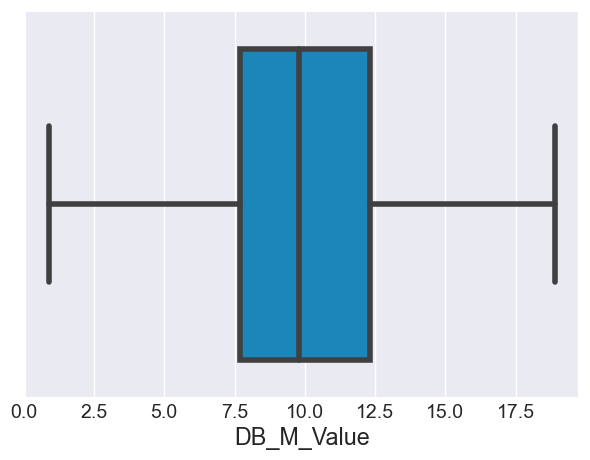

In [1368]:
sns.boxplot(x='DB_M_Value', data=df)


C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\1637939683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DB_M_Value'])


<Axes: xlabel='DB_M_Value', ylabel='Density'>

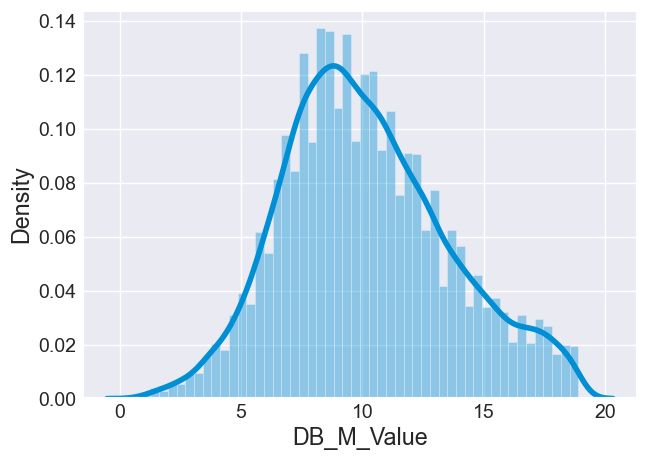

In [1369]:
sns.distplot(df['DB_M_Value'])

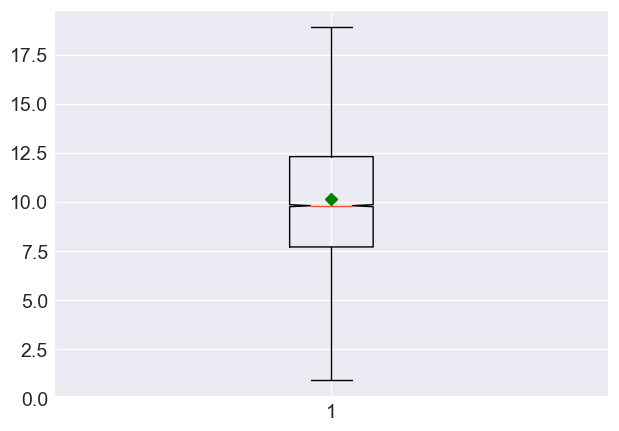

In [1370]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['DB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

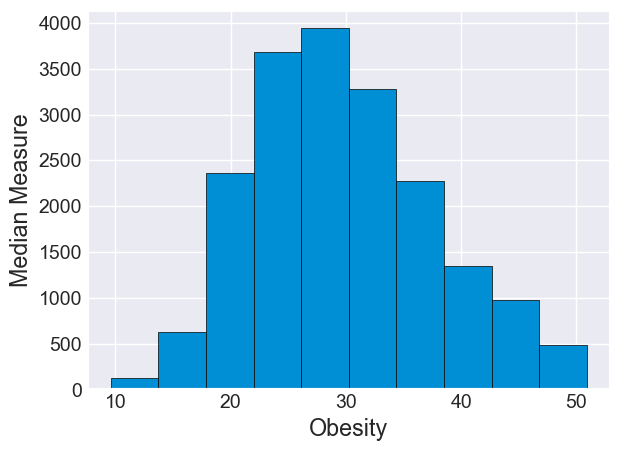

In [1371]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

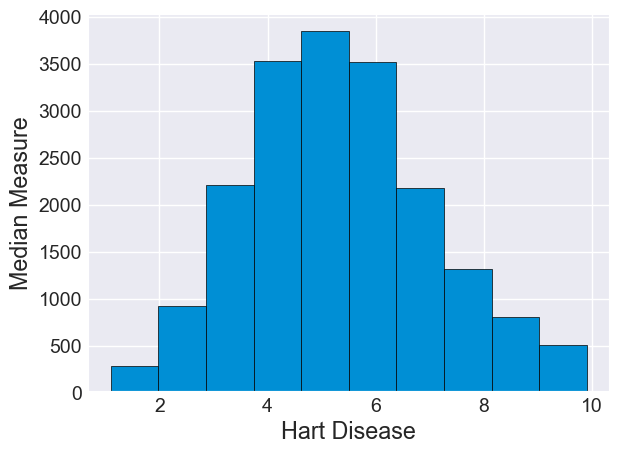

In [1372]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

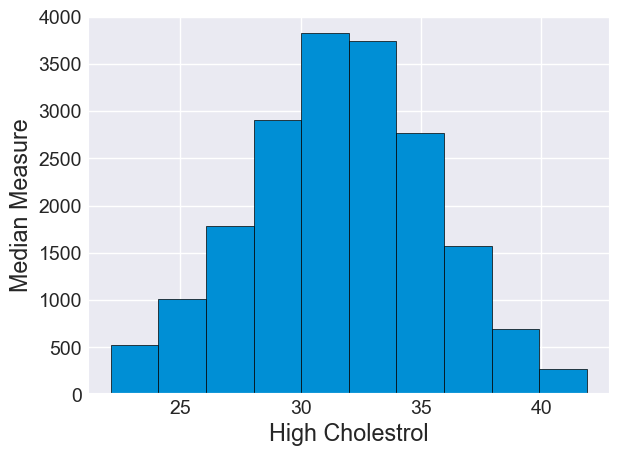

In [1373]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

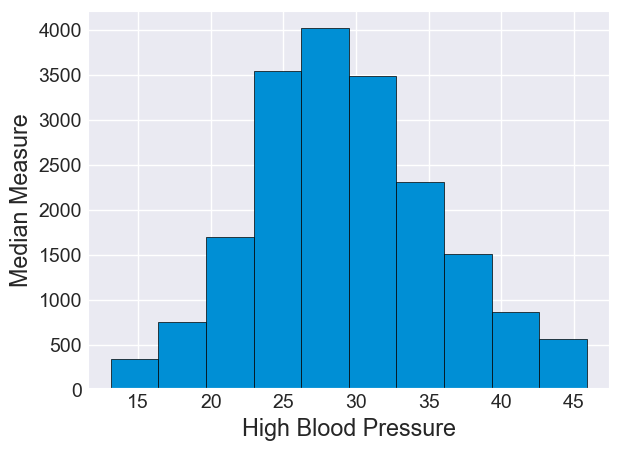

In [1374]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

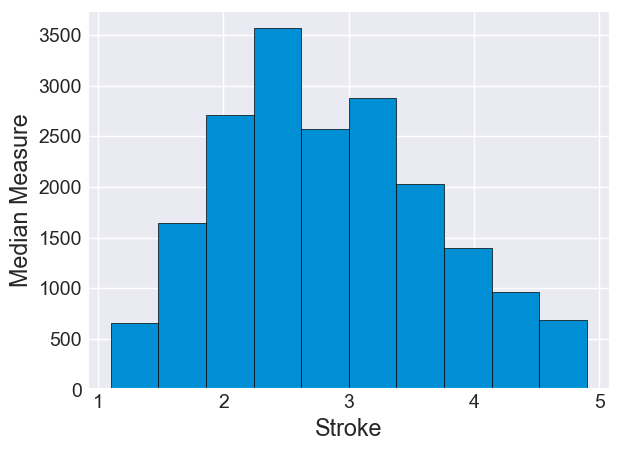

In [1375]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [1376]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

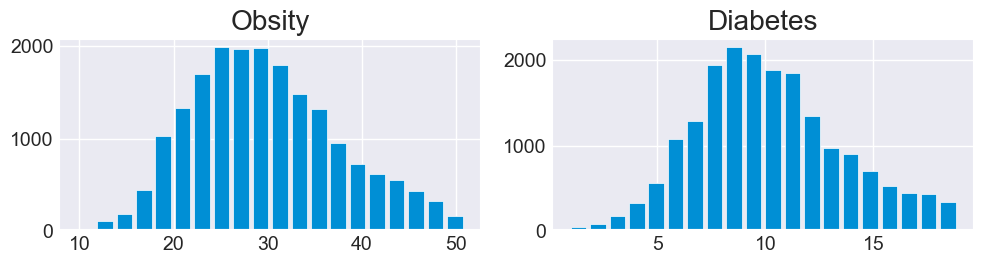

In [1377]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




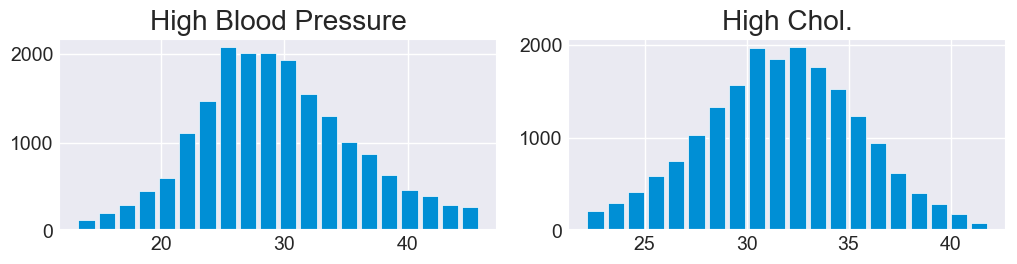

In [1378]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




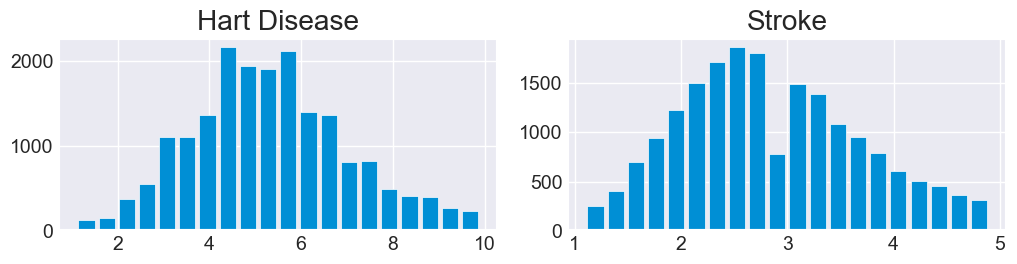

In [1379]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



In [1380]:
np.percentile(df['HD_M_Value'],1)

1.8

In [1381]:
np.percentile(df['HD_M_Value'],25)

4.1

In [1382]:
np.percentile(df['HD_M_Value'],50)

5.2

In [1383]:
np.percentile(df['HD_M_Value'],85)

7.1

In [1384]:
np.percentile(df['HD_M_Value'],95)

8.5

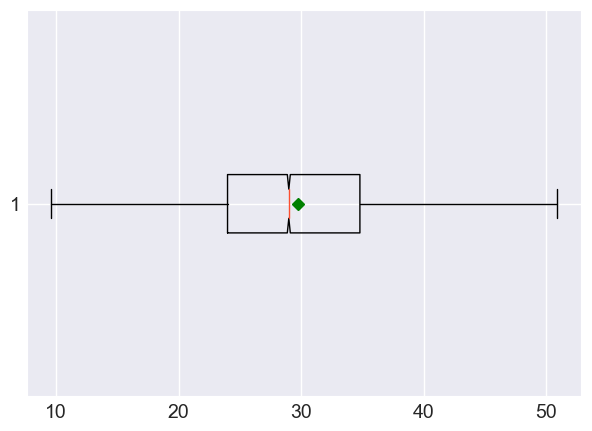

In [1385]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

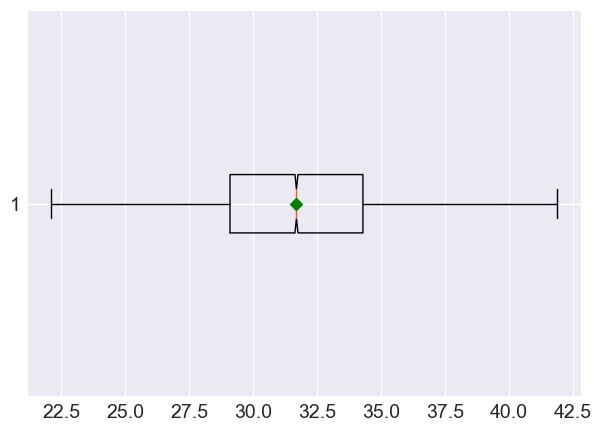

In [1386]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

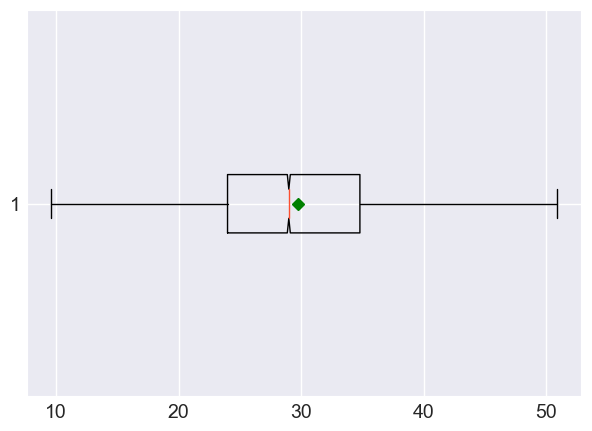

In [1387]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

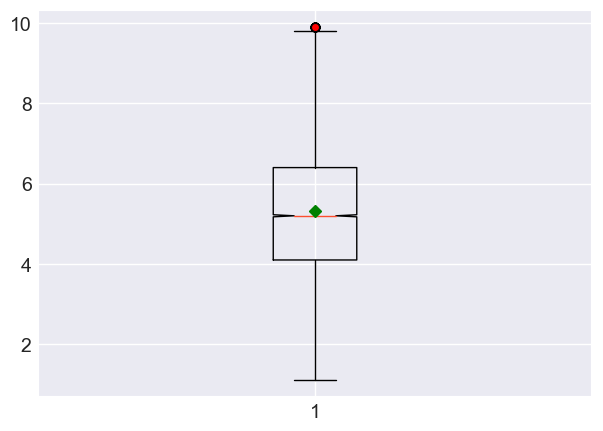

In [1388]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HD_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

<Axes: xlabel='DB_M_Value'>

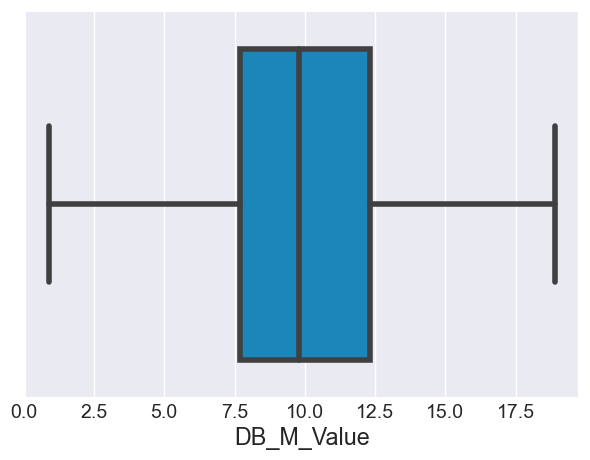

In [1389]:
sns.boxplot(x='DB_M_Value', data=df)

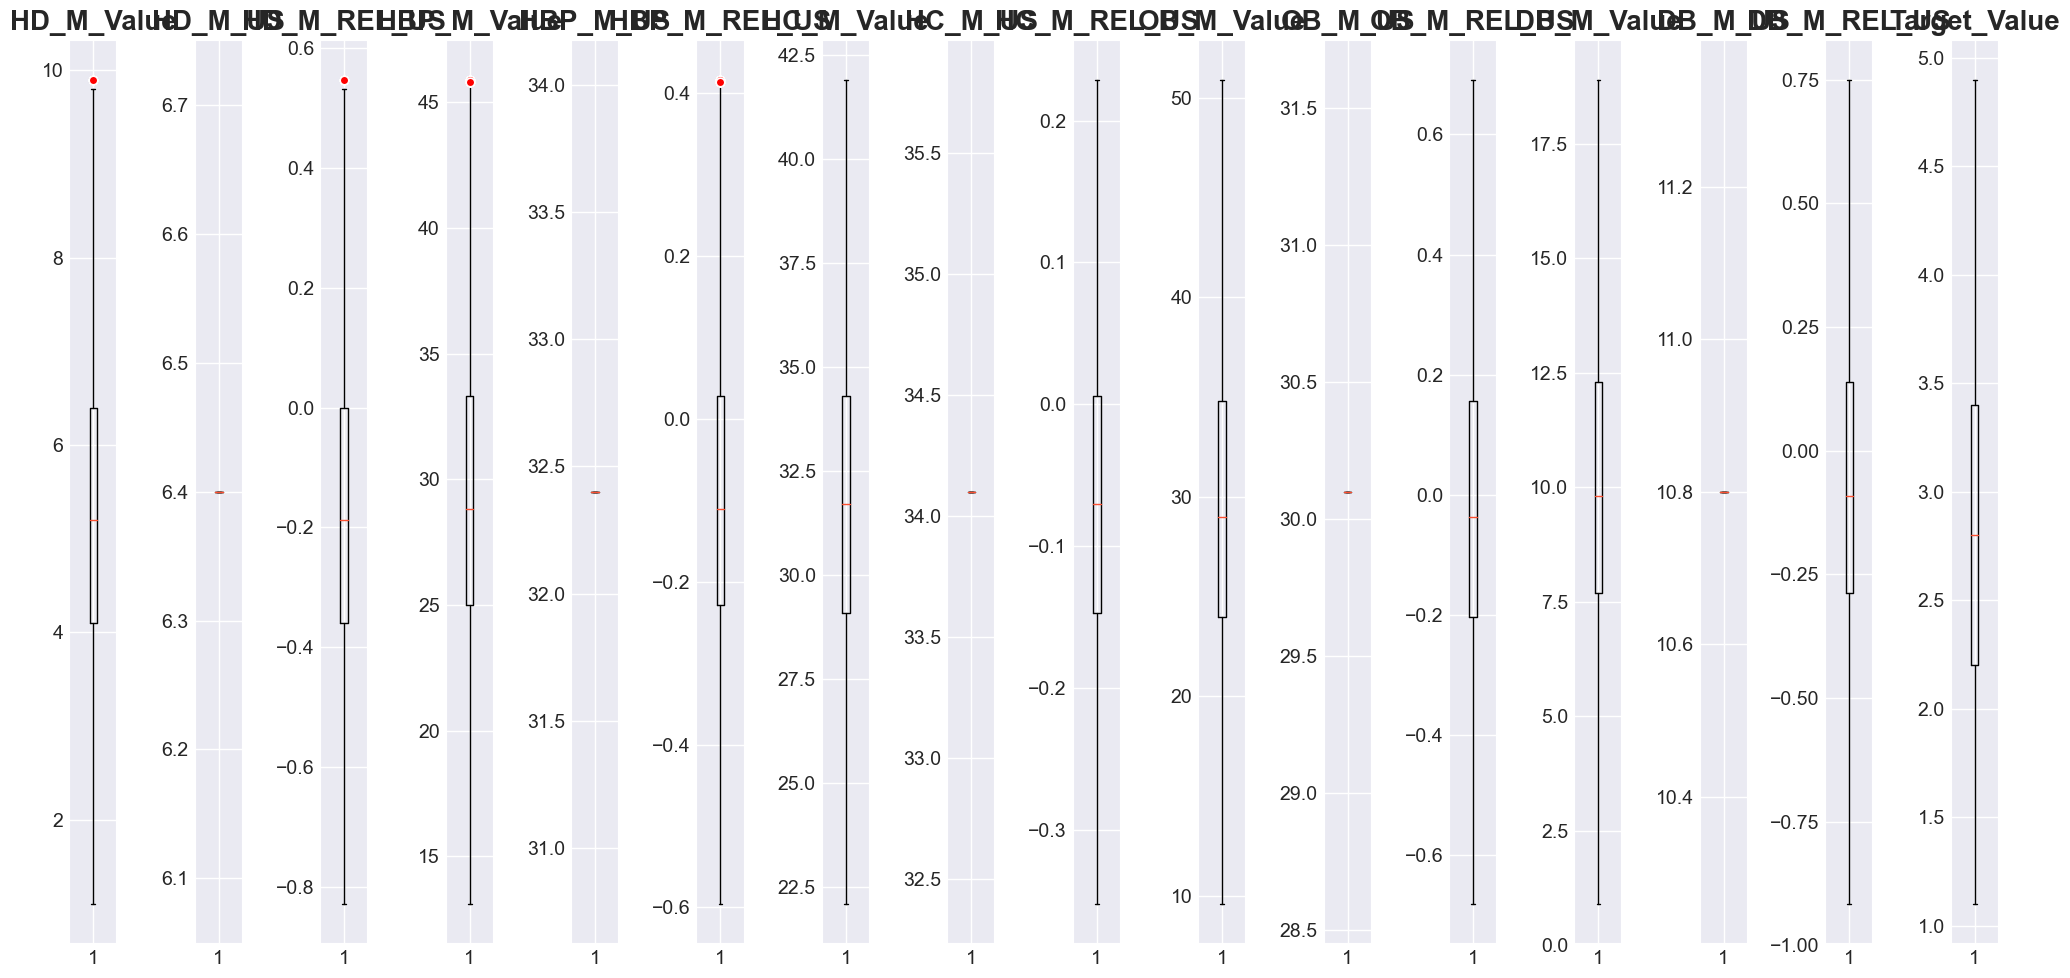

In [1390]:
#Subplot


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [1391]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


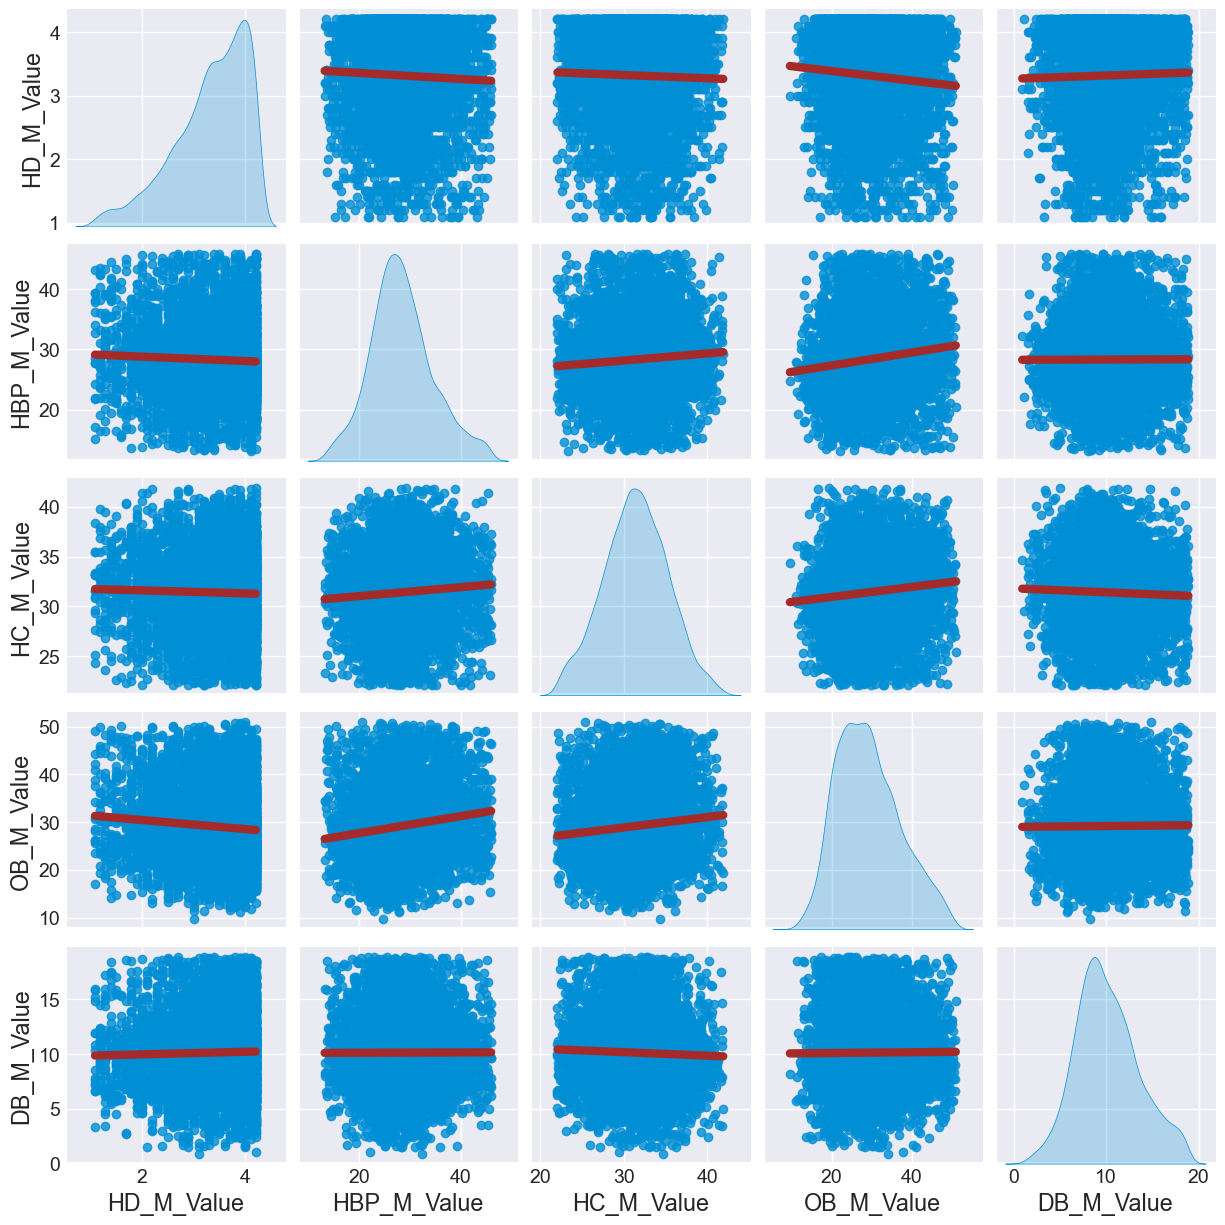

In [1392]:
# plot 
df02 = df[df['HD_M_Value'] <= 4.200000 ]
col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
sns.pairplot(df02[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
#sns.pairplot(df02[col_to_plot01], hue='OB_M_Value' )


In [1393]:
#Scattler plot - Relationship between Obesity and Diabetes.
#plt.xlabel('High Blood Pressure and Cholesterol')
#plt.ylabel('Stroke')
#plt.scatter(df.HD_M_Value, df.HC_M_Value, color= 'red', marker='*')
#plt.show()



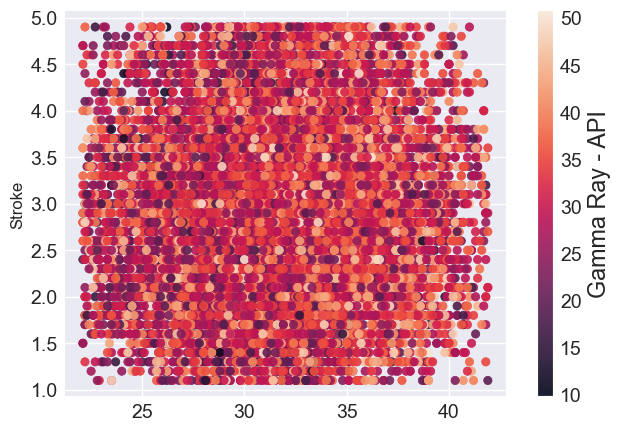

In [1394]:

#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9) # alpha is the clarity of the colors
#plt.scatter(x='HBP_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
plt.scatter(x='HC_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='OB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='DB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)


#plt.xlabel('Heart Disease', fontsize=12)
#plt.xlabel('High Blood Pressure', fontsize=12)

plt.ylabel('Stroke', fontsize=12)
plt.colorbar(label='Gamma Ray - API')
plt.show()

In [1395]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

## Dividing the dataset into independent and dependent features.

In [1396]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [1397]:
ml01_df = df.drop(columns = [ 'HD_M_REL_US', 'HBP_M_REL_US',  'HC_M_REL_US',  'OB_M_REL_US', 'DB_M_REL_US' ])

In [1398]:
ml02_df = df.drop(columns = ['HD_M_US', 'HD_M_REL_US', 'HBP_M_US','HBP_M_REL_US', 'HC_M_US', 'HC_M_REL_US', 'OB_M_US', 'OB_M_REL_US','DB_M_US', 'DB_M_REL_US' ])

In [1399]:
ml_df

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9,1.3
27206,4.9,32.5,30.7,33.0,7.4,3.1
27207,6.7,31.3,28.0,33.9,10.3,4.5
27208,5.2,31.9,34.1,29.7,16.4,4.9


In [1400]:

X=ml01_df.iloc[:, :-1] # Independent features.
y=ml01_df.iloc[:, -1]  # dependent feature (Stroke).

#X

ML Analysis - LinearRegression Model

In [1411]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [1414]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#80% training - it chooses ramdom samples.
len(X_train)
#30% or what ever % specified.
len(X_test)

X_train

,HD_M_Value,HD_M_US,HBP_M_Value,HBP_M_US,HC_M_Value,HC_M_US,OB_M_Value,OB_M_US,DB_M_Value,DB_M_US
17351,4.3,6.4,38.4,32.4,31.5,34.1,23.3,30.1,11.6,10.8
19190,5.4,6.4,23.1,32.4,29.1,34.1,35.8,30.1,12.6,10.8
22805,4.4,6.4,32.2,32.4,24.4,34.1,23.0,30.1,6.3,10.8
3599,4.9,6.4,25.6,32.4,33.9,34.1,18.9,30.1,13.7,10.8
23817,9.2,6.4,28.1,32.4,37.9,34.1,43.3,30.1,4.9,10.8
...,...,...,...,...,...,...,...,...,...,...
11018,4.3,6.4,32.0,32.4,32.4,34.1,42.5,30.1,12.7,10.8
11325,4.4,6.4,39.8,32.4,35.4,34.1,32.2,30.1,14.3,10.8
20158,8.2,6.4,35.8,32.4,27.1,34.1,35.9,30.1,10.6,10.8
5769,4.7,6.4,25.8,32.4,31.8,34.1,13.5,30.1,12.7,10.8


ML Analyzing using - Linear Regression Model.

In [1415]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [1416]:
ml01_df.head()

,HD_M_Value,HD_M_US,HBP_M_Value,HBP_M_US,HC_M_Value,HC_M_US,OB_M_Value,OB_M_US,DB_M_Value,DB_M_US,Target_Value
0,4.2,6.4,32.3,32.4,34.1,34.1,30.3,30.1,12.2,10.8,3.4
2,5.8,6.4,33.8,32.4,36.7,34.1,17.3,30.1,9.9,10.8,3.1
3,4.4,6.4,27.4,32.4,27.1,34.1,22.1,30.1,14.7,10.8,2.0
5,3.5,6.4,24.4,32.4,27.5,34.1,25.3,30.1,11.4,10.8,2.6
6,5.5,6.4,28.1,32.4,33.7,34.1,22.5,30.1,3.4,10.8,2.9


In [1417]:
modelReg.predict([[ 5.5,	6.4,	28.1,	32.4,	33.7,	34.1,	22.5,	30.1,	3.4, 	10.8		]])

c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.81202698])

In [1418]:
r2_score(y_test,y_pred)

-0.07057318957696102

In [1419]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test


print(r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error

# The mean of the absolute error - this is mean of the residuat error of the test.

0.007078157969331311
r2:-79.64384863797778  
mae:0.6805815780208548  
0.6805815780208548
0.23937868875141788


ML Analyzing using - Decision Tree Model.

Text(0.5, 1.0, 'Actual vs. Preducted')

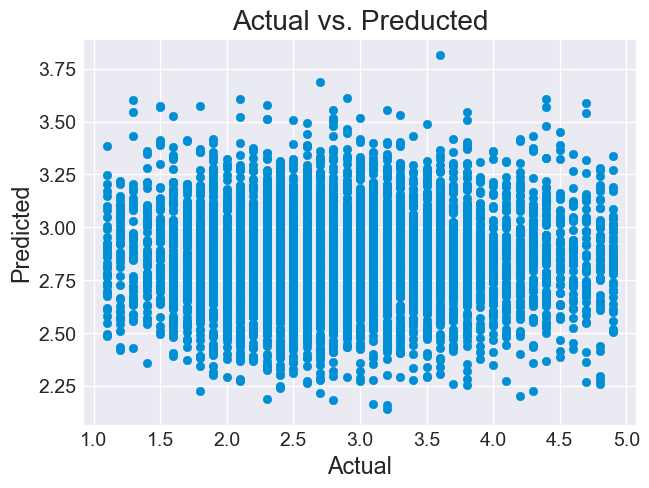

In [1424]:

#plt.figure(figsize=(15,15))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Preducted')

In [1421]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


print(r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error


-1.08326512650856
r2:-0.883532917044543  
mae:0.9751831182420648  
0.9751831182420648
0.3856471544480369


#### ML Analyzing using - RandomForestRegressor Model.

In [1422]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)


print(r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error


-0.05717181499224755
r2:-13.983606851977417  
mae:0.7001979420997558  
0.7001979420997558
0.2461256156359235
